<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/DimensionalityReductionUsingFeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimentionality Reduction Using Feature Selection

Deux façons de réduire la dimension:

* Avec du feature extraction(PCA, KernelPCA, NMF, TruncatedSVD, LineaderDiscriminantAnalysis ...)
* Et avec du feature selection que nous voyons maintenant

Ici nous allons  voir comment récupérer certaines fonctionnalités en se basant sur la qualité de ce dernières, sur les caractéristiques les plus informatives

Trois methodes dans le feature selection:

* filter
* wrapper
* embadded

La methode **filter**, Sélectionne les caractéristiques importantes en se basant sur les propriétés statistiques;

La methode **wrapper**, Trouve un échantillon des données qui permettrai d'avoir une haute qualité de la prédiction

## 10.1 Thresholding Numerical Feature Variance

**Problème**

Vous disposez d'un ensemble d'entités numériques et souhaitez supprimer celles dont la variance est faible (c'est-à-dire qui contiennent probablement peu d'informations).

**Solution**

Sélectionnez un sous-ensemble de caractéristiques avec des variances supérieures à un seuil donné :

In [35]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [36]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

In [37]:
#  Load data
iris = load_iris()

In [38]:
# Create features and targets
features = iris.data
target = iris.target

In [39]:
# Create thresholder
tresholder = VarianceThreshold(threshold=0.5)

In [40]:
# Create high variance feature matrix
features_high_variance = tresholder.fit_transform(features)

In [41]:
print("Original dimension", features.shape)
print("Dimension Selected", features_high_variance.shape)

Original dimension (150, 4)
Dimension Selected (150, 3)


In [42]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [43]:
features_high_variance[:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

In [44]:
np.var(features, axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [45]:
# Show the variance
tresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

## 10.2 Thresholding Binary Feature Variance

**Problème**

Vous disposez d'un ensemble de caractéristiques catégorielles binaires et souhaitez supprimer celles dont la variance est faible (c'est-à-dire qui contiennent probablement peu d'informations).

**Solution**

Sélectionnez un sous-ensemble d'entités avec une variance de variable aléatoire de Bernoulli supérieure à une donnée
au seuil:

In [46]:
# Load library
from sklearn.feature_selection import VarianceThreshold

In [47]:
# Create feature matrix with:
# Feature 0: 80% class 0
# Feature 1: 80% class 1
# Feature 2: 60% class 0, 40% class 1
features = [
            [0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]

In [48]:
# Show features
print(features)

[[0, 1, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0]]


In [49]:
# Run threshold by variance
thresholder = VarianceThreshold(threshold=(0.75 * (1-0.75)))

In [50]:
# Fit and transform features
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

Tout comme pour les caractéristiques numériques, une stratégie pour sélectionner des caractéristiques catégorielles hautement informatives consiste à examiner leurs variances. Dans les caractéristiques binaires (c'est-à-dire, Bernoulli aléatoire
variables), la variance est calculée comme suit :

Var(x) = p(1 - p)

**p** est la proportion des observations

## 10.3 Handling Highly Correlated Features

**Problème**

Vous avez une matrice de caractéristiques et pensez que certaines caractéristiques sont fortement corrélées.

**Solution**

Utilisez une matrice de corrélation pour vérifier les caractéristiques hautement corrélées. Si fortement corrélé
fonctionnalités existent, envisagez de supprimer l'une des fonctionnalités corrélées :

In [51]:
features = np.array([[1, 1, 1],
[2, 2, 0],
[3, 3, 1],
[4, 4, 0],
[5, 5, 1],
[6, 6, 0],
[7, 7, 1],
[8, 7, 0],
[9, 7, 1]])

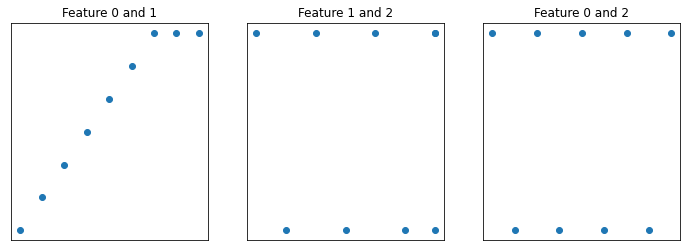

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(features[:, 0], features[:, 1])
axes[0].set_title('Feature 0 and 1')
axes[1].scatter(features[:, 1], features[:, 2])
axes[1].set_title('Feature 1 and 2')
axes[2].scatter(features[:, 0], features[:, 2])
axes[2].set_title('Feature 0 and 2')

axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].set_xticks([]); axes[1].set_yticks([]) 
axes[2].set_xticks([]); axes[2].set_yticks([]) 
plt.show()

In [59]:
# Create feature matrix in dataframe
df = pd.DataFrame(features)
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [62]:
df.corr()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [63]:
df.corr().abs()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


In [64]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Show correaltion matrix
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


## 10.4 Removing Irrelevant Features for Classification

**Problem**

You have a categorical target vector and want to remove uninformative features.

**Solution**

If the features are categorical, calculate a chi-square (χ 2 ) statistic between each feature
and the target vector:

**NB: le khi-deux, permet de tester la dépendance ou l'indépendance d'une variable à une autre**

In [65]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [66]:
# Load data
features = load_iris().data
target = load_iris().target

In [67]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [68]:
# Converting data to integer
features = features.astype(int)

features[:5]


array([[5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0]])

In [69]:
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)

In [71]:
# Transform the features
features_kbest = chi2_selector.fit_transform(features, target)

In [74]:
# Show results
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_kbest.shape))

Original number of features: (150, 4)
Reduced number of features: (150, 2)


In [77]:
# Show the first ten rows after selection
features_kbest[:10]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

**Si les caractéristiques sont quantitatives**

In [86]:
# Create the selector
selector = SelectKBest(f_classif, k=2)

In [87]:
# Fit and transform the features
features_kbest = selector.fit_transform(features, target)

In [88]:
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_kbest.shape))

Original number of features: (150, 4)
Reduced number of features: (150, 2)


In [89]:
# Show the reduce data
features_kbest[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

**On peut sélectionner un pourcentage donné des caractéristiques telles que:**

In [90]:
# Select library
from sklearn.feature_selection import SelectPercentile

In [91]:
# Select top 75% of features with highest F-values
selector = SelectPercentile(f_classif, percentile=75)

In [93]:
# Fit and transform features
features_selected = selector.fit_transform(features, target)

In [94]:
# Show results
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_selected.shape))

Original number of features: (150, 4)
Reduced number of features: (150, 3)
